In [1]:
!pip install kaggle

In [2]:
import numpy as np
import pandas as pd
import spacy
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
#from tensorflow.keras import layers
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack


In [3]:
# from google.colab import files

# uploaded = files.upload()

# #import both files AT ONCE!

In [4]:
# importing dataset
trainingSet = pd.read_csv('Assignment Data/twitter_training.csv')
validationSet = pd.read_csv('Assignment Data/twitter_validation.csv')

trainingSet.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']
validationSet.columns = ['Twitter ID', 'Entity', 'Sentiment', 'Tweets']

In [5]:
trainingSet

,Twitter ID,Entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
validationSet

,Twitter ID,Entity,Sentiment,Tweets
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# Exploratory Data Analysis

In [7]:
trainingSet.describe()

,Twitter ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [8]:
validationSet.describe()

,Twitter ID
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


C:\Users\Loricson\AppData\Local\Temp\ipykernel_15836\119773954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  xAxis = sns.countplot(x = 'Sentiment', data = trainingSet, palette = 'muted')


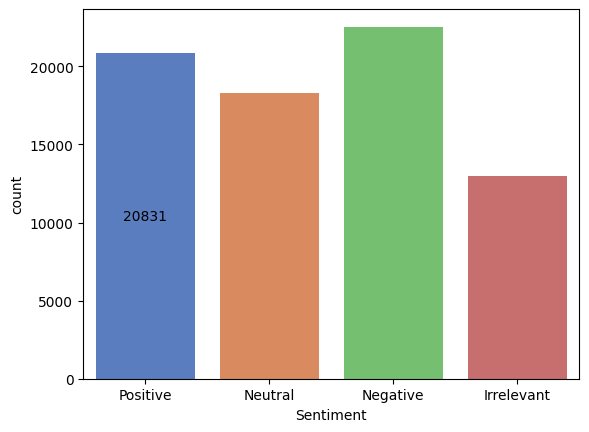

In [9]:
xAxis = sns.countplot(x = 'Sentiment', data = trainingSet, palette = 'muted')
xAxis.bar_label(xAxis.containers[0], label_type='center')
plt.show()

C:\Users\Loricson\AppData\Local\Temp\ipykernel_15836\2663413331.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  xAxis = sns.countplot(x = 'Sentiment', data = validationSet, palette = 'muted')


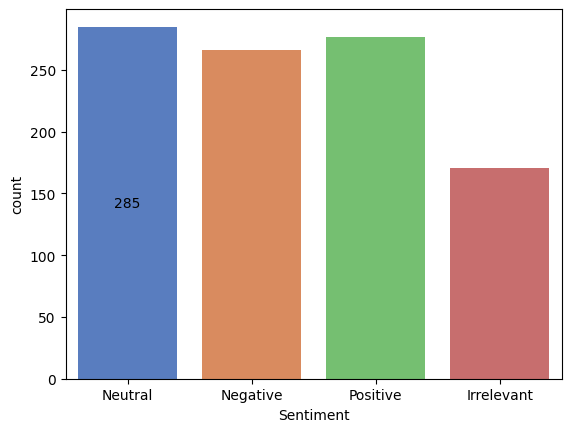

In [10]:
xAxis = sns.countplot(x = 'Sentiment', data = validationSet, palette = 'muted')
xAxis.bar_label(xAxis.containers[0], label_type='center')
plt.show()

In [11]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  74681 non-null  int64 
 1   Entity      74681 non-null  object
 2   Sentiment   74681 non-null  object
 3   Tweets      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
validationSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  999 non-null    int64 
 1   Entity      999 non-null    object
 2   Sentiment   999 non-null    object
 3   Tweets      999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


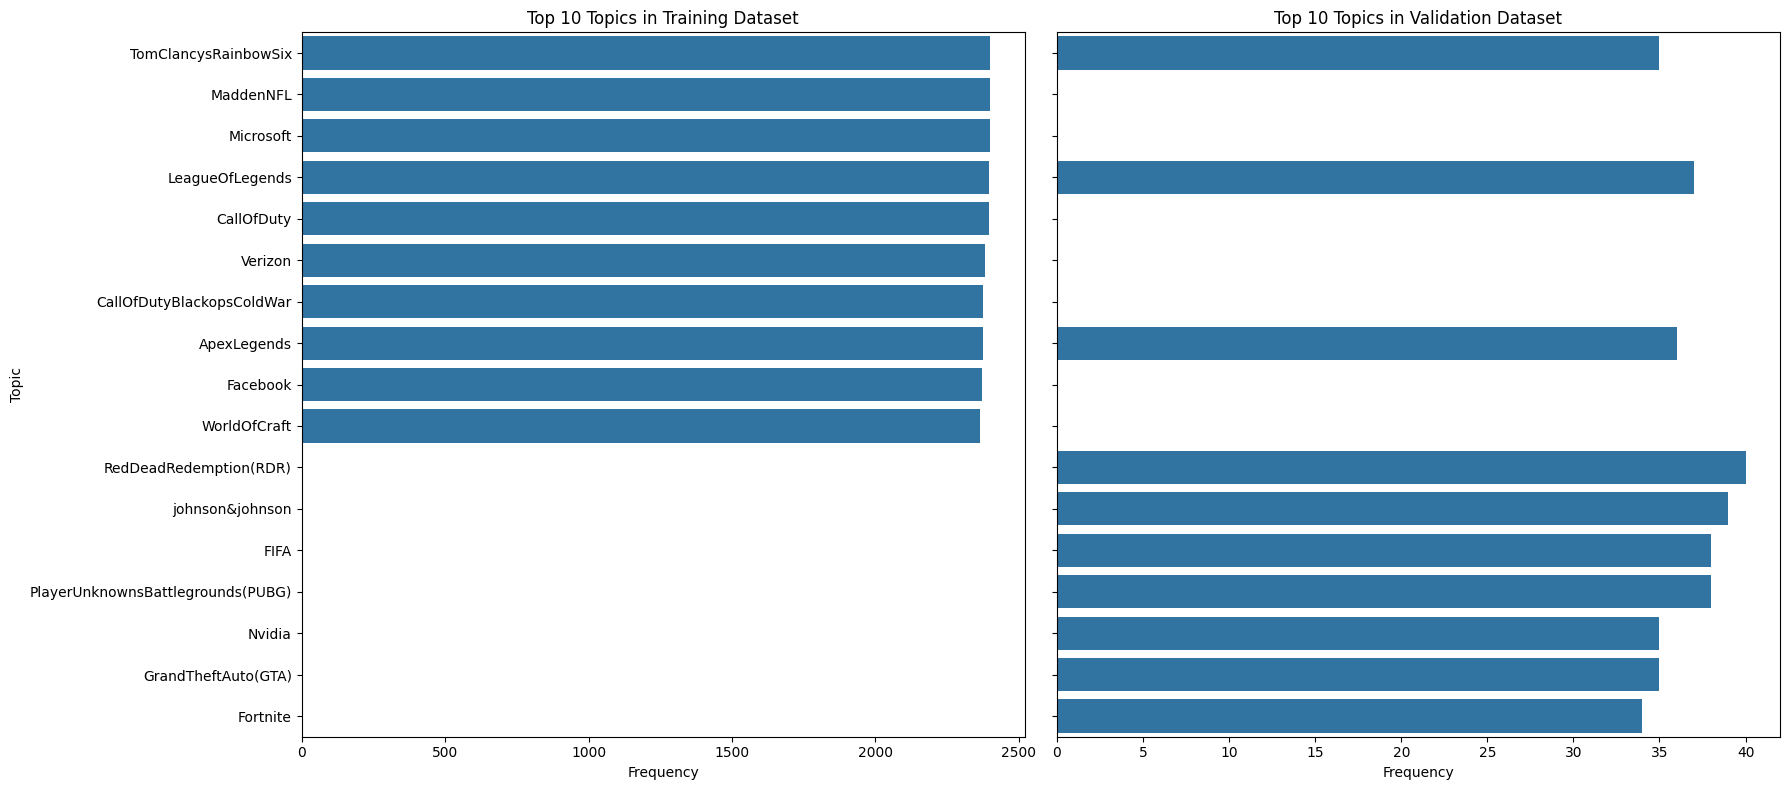

(Entity
 TomClancysRainbowSix         2400
 MaddenNFL                    2400
 Microsoft                    2400
 LeagueOfLegends              2394
 CallOfDuty                   2394
 Verizon                      2382
 CallOfDutyBlackopsColdWar    2376
 ApexLegends                  2376
 Facebook                     2370
 WorldOfCraft                 2364
 Name: count, dtype: int64,
 Entity
 RedDeadRedemption(RDR)               40
 johnson&johnson                      39
 FIFA                                 38
 PlayerUnknownsBattlegrounds(PUBG)    38
 LeagueOfLegends                      37
 ApexLegends                          36
 Nvidia                               35
 TomClancysRainbowSix                 35
 GrandTheftAuto(GTA)                  35
 Fortnite                             34
 Name: count, dtype: int64)

In [13]:
# Calculate topic frequency for both datasets
topic_frequency_training = trainingSet['Entity'].value_counts().head(10)
topic_frequency_validation = validationSet['Entity'].value_counts().head(10)

# Plotting topic frequency for training and validation datasets
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

sns.barplot(y=topic_frequency_training.index, x=topic_frequency_training.values, ax=ax[0])
ax[0].set_title('Top 10 Topics in Training Dataset')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Topic')

sns.barplot(y=topic_frequency_validation.index, x=topic_frequency_validation.values, ax=ax[1])
ax[1].set_title('Top 10 Topics in Validation Dataset')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

topic_frequency_training, topic_frequency_validation



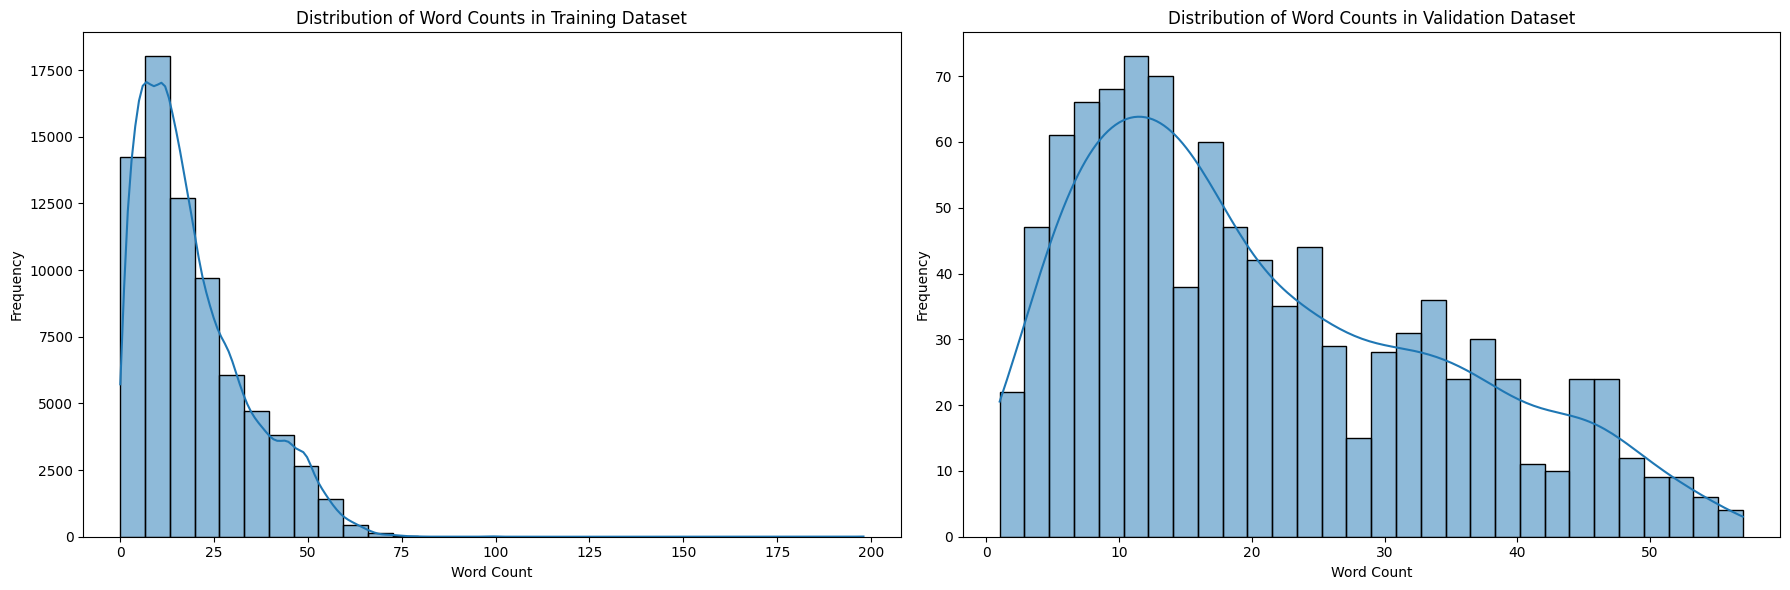

(count    73995.000000
 mean        19.226732
 std         14.442635
 min          0.000000
 25%          8.000000
 50%         16.000000
 75%         27.000000
 max        198.000000
 Name: word_count, dtype: float64,
 count    999.000000
 mean      20.913914
 std       13.486600
 min        1.000000
 25%       10.000000
 50%       17.000000
 75%       31.000000
 max       57.000000
 Name: word_count, dtype: float64)

In [14]:
# Calculate word counts for each tweet in both datasets
trainingSet['word_count'] = trainingSet['Tweets'].str.split().str.len()
validationSet['word_count'] = validationSet['Tweets'].str.split().str.len()

# Plotting distribution of word counts
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(trainingSet['word_count'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Word Counts in Training Dataset')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

sns.histplot(validationSet['word_count'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Word Counts in Validation Dataset')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Basic statistics of word counts in both datasets
stats_training = trainingSet['word_count'].describe()
stats_validation = validationSet['word_count'].describe()

stats_training, stats_validation


In [15]:
# Calculate the number of missing tweet texts in the training dataset
missing_tweets_training = trainingSet['Tweets'].isnull().sum()

# Proportion of missing tweet texts
missing_proportion_training = missing_tweets_training / len(trainingSet)

missing_tweets_training, missing_proportion_training


(686, 0.009185736666622032)

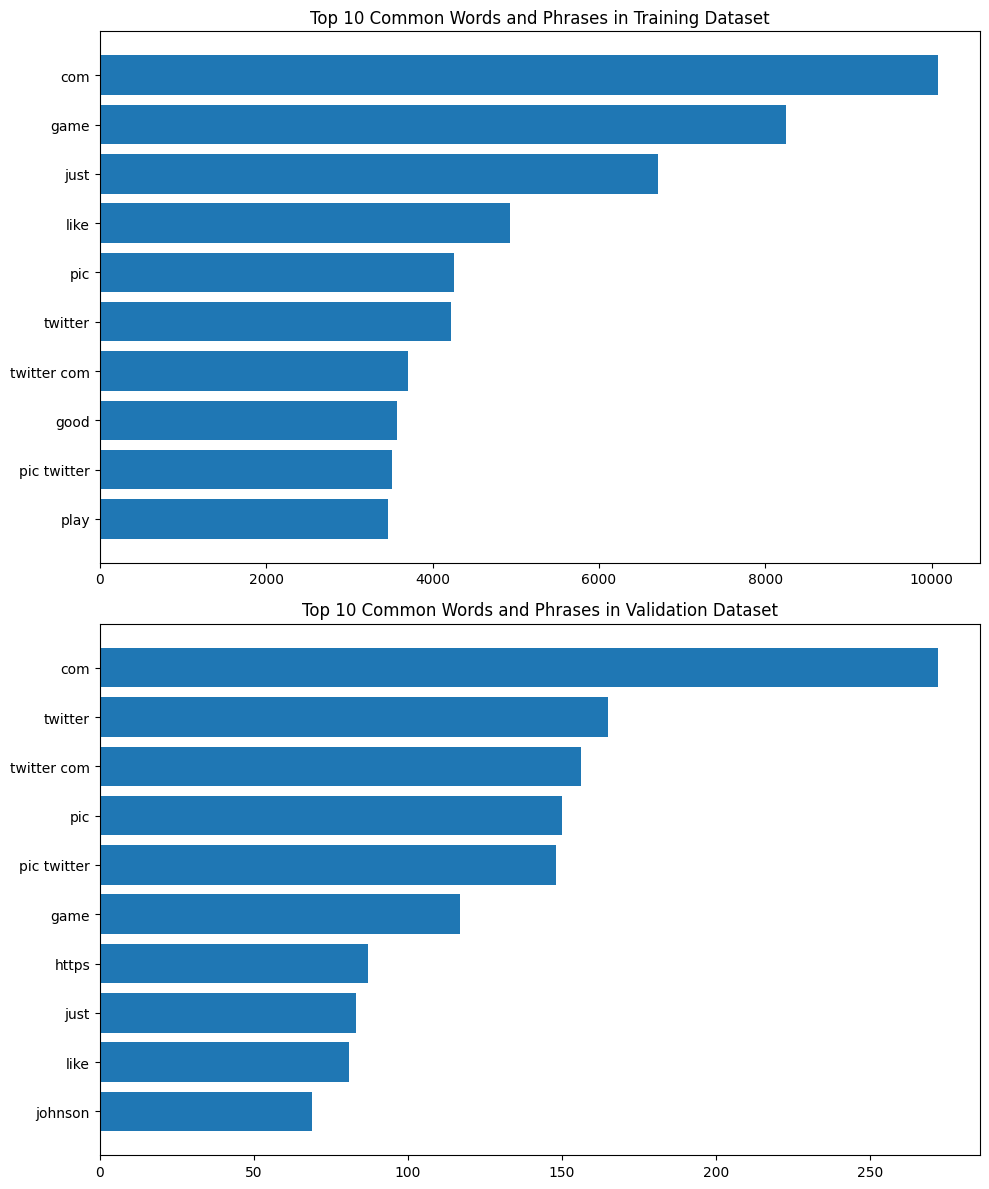

In [16]:
def get_common_words_phrases(text_series, n_features=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=n_features, ngram_range=(1, 2))
    word_matrix = vectorizer.fit_transform(text_series.dropna())
    sum_words = word_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n_features]


common_words_phrases_training = get_common_words_phrases(trainingSet['Tweets'], 10)
common_words_phrases_validation = get_common_words_phrases(validationSet['Tweets'], 10)

# Plotting the most common words and phrases for both datasets
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Training dataset
words_training, freqs_training = zip(*common_words_phrases_training)
ax[0].barh(words_training, freqs_training)
ax[0].set_title('Top 10 Common Words and Phrases in Training Dataset')
ax[0].invert_yaxis()

# Validation dataset
words_validation, freqs_validation = zip(*common_words_phrases_validation)
ax[1].barh(words_validation, freqs_validation)
ax[1].set_title('Top 10 Common Words and Phrases in Validation Dataset')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()



# Data Cleaning

In [17]:
#converting columns from object to string

trainingSet['Entity'] = trainingSet['Entity'].apply(str)
trainingSet['Sentiment'] = trainingSet['Sentiment'].apply(str)
trainingSet['Tweets'] = trainingSet['Tweets'].apply(str)

validationSet['Entity'] = validationSet['Entity'].apply(str)
validationSet['Sentiment'] = validationSet['Sentiment'].apply(str)
validationSet['Tweets'] = validationSet['Tweets'].apply(str)

In [18]:
# Check for missing values in both datasets
missing_values_training = trainingSet.isnull().sum()
missing_values_validation = validationSet.isnull().sum()

missing_values_training, missing_values_validation


(Twitter ID      0
 Entity          0
 Sentiment       0
 Tweets          0
 word_count    686
 dtype: int64,
 Twitter ID    0
 Entity        0
 Sentiment     0
 Tweets        0
 word_count    0
 dtype: int64)

In [19]:
#Lowercasing

trainingSet['Tweets'] = trainingSet['Tweets'].str.lower()
validationSet['Tweets'] = validationSet['Tweets'].str.lower()


In [20]:
# Removing Special Characters and Numbers

trainingSet['Tweets'] = trainingSet['Tweets'].str.replace('[^a-zA-Z\s]', '', regex=True)
validationSet['Tweets'] = validationSet['Tweets'].str.replace('[^a-zA-Z\s]', '', regex=True)



In [21]:
# Removing Extra Spaces

trainingSet['Tweets'] = trainingSet['Tweets'].str.replace('\s+', ' ', regex=True).str.strip()
validationSet['Tweets'] = validationSet['Tweets'].str.replace('\s+', ' ', regex=True).str.strip()


In [22]:
trainingSet

,Twitter ID,Entity,Sentiment,Tweets,word_count
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,12.0
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,10.0
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10.0
3,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,12.0
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10.0
...,...,...,...,...,...
74676,9200,Nvidia,Positive,just realized that the windows partition of my...,26.0
74677,9200,Nvidia,Positive,just realized that my mac window partition is ...,23.0
74678,9200,Nvidia,Positive,just realized the windows partition of my mac ...,25.0
74679,9200,Nvidia,Positive,just realized between the windows partition of...,32.0


In [23]:
validationSet

,Twitter ID,Entity,Sentiment,Tweets,word_count
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...,16
1,8312,Microsoft,Negative,microsoft why do i pay for word when it functi...,17
2,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...,13
3,4433,Google,Neutral,now the president is slapping americans in the...,25
4,6273,FIFA,Negative,hi eahelp ive had madeleine mccann in my cella...,52
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of can...,47
995,4359,CS-GO,Irrelevant,this is actually a good move tot bring more vi...,46
996,2652,Borderlands,Positive,today sucked so its time to drink wine n play ...,24
997,8069,Microsoft,Positive,bought a fraction of microsoft today small wins,8


In [24]:
print(trainingSet.columns)
print(validationSet.columns)

Index(['Twitter ID', 'Entity', 'Sentiment', 'Tweets', 'word_count'], dtype='object')
Index(['Twitter ID', 'Entity', 'Sentiment', 'Tweets', 'word_count'], dtype='object')


In [25]:
cols = ['Twitter ID', 'Entity', 'word_count']
x = trainingSet.drop(cols, axis=1, inplace=True)

In [26]:
cols = ['Twitter ID', 'Entity', 'word_count']
x = validationSet.drop(cols, axis=1, inplace=True)

In [27]:
print(trainingSet.columns)
print(validationSet.columns)

Index(['Sentiment', 'Tweets'], dtype='object')
Index(['Sentiment', 'Tweets'], dtype='object')


## Encode Categorical Column (Sentiment)

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(trainingSet["Sentiment"])

trainingSet["Sentiment"] = encoder.transform(trainingSet["Sentiment"])
validationSet["Sentiment"] = encoder.transform(validationSet["Sentiment"])

In [29]:
validationSet

,Sentiment,Tweets
0,2,bbc news amazon boss jeff bezos rejects claims...
1,1,microsoft why do i pay for word when it functi...
2,1,csgo matchmaking is so full of closet hacking ...
3,2,now the president is slapping americans in the...
4,1,hi eahelp ive had madeleine mccann in my cella...
...,...,...
994,0,toronto is the arts and culture capital of can...
995,0,this is actually a good move tot bring more vi...
996,3,today sucked so its time to drink wine n play ...
997,3,bought a fraction of microsoft today small wins


In [30]:
trainingSet

,Sentiment,Tweets
0,3,i am coming to the borders and i will kill you...
1,3,im getting on borderlands and i will kill you all
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands and i will murder yo...
4,3,im getting into borderlands and i can murder y...
...,...,...
74676,3,just realized that the windows partition of my...
74677,3,just realized that my mac window partition is ...
74678,3,just realized the windows partition of my mac ...
74679,3,just realized between the windows partition of...


## Tokenization

In [31]:
import nltk
nltk.download('punkt')

# Tokenization
trainingSet['Tweets'] = trainingSet['Tweets'].apply(lambda x: word_tokenize(x))
validationSet['Tweets'] = validationSet['Tweets'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Loricson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    if isinstance(text, list):
        return [word for word in text if word not in stop_words]
    else:
        return ' '.join([word for word in text.split() if word not in stop_words])

trainingSet['Tweets'] = trainingSet['Tweets'].apply(remove_stopwords)
validationSet['Tweets'] = validationSet['Tweets'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Loricson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Lemmatization
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # Load English model

# Function to apply lemmatization
def lemmatize_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to the Tweets
trainingSet['Tweets'] = trainingSet['Tweets'].apply(lemmatize_text)
validationSet['Tweets'] = validationSet['Tweets'].apply(lemmatize_text)

In [34]:
# Initialize the TfidfVectorizer
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), min_df=3, max_df=0.9)

# Fit and transform the training data
X_train_tfidf = tfidf_vect.fit_transform(trainingSet['Tweets'])

# Transform the validation dataset
X_validation_tfidf = tfidf_vect.transform(validationSet['Tweets'])

In [35]:
X_train_tfidf

<74681x94560 sparse matrix of type '<class 'numpy.float64'>'
	with 1047923 stored elements in Compressed Sparse Row format>

In [36]:
X_train_tfidf.shape

(74681, 94560)

In [37]:
# Encode categorical target variable into numerical labels if needed
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#trainingSet['Sentiment_encoded'] = label_encoder.fit_transform(trainingSet['Sentiment'])
label_encoder.fit_transform(trainingSet['Sentiment'])

# Encode categorical target variable into numerical labels for validation set
#validationSet['Sentiment_encoded'] = label_encoder.transform(validationSet['Sentiment'])
label_encoder.transform(validationSet['Sentiment'])

array([2, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 0, 1, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 0, 1, 2, 1,
       0, 2, 1, 3, 1, 1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2, 1, 0, 1,
       2, 2, 1, 3, 0, 0, 1, 1, 1, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 2, 0, 3, 2,
       3, 3, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 3, 1, 2, 2, 2,
       0, 2, 1, 2, 3, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 0,
       2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 1, 1, 1, 1,
       3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 1, 0, 0, 1, 3, 3, 1, 0,
       1, 3, 3, 1, 0, 0, 3, 3, 1, 3, 0, 2, 0, 0, 1, 2, 2, 3, 1, 0, 0, 3,
       3, 0, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 1,
       3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3, 2,
       2, 1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 2, 1, 0, 3,

In [38]:
trainingSet

,Sentiment,Tweets
0,3,come border kill
1,3,I m get borderland kill
2,3,I m come borderland murder
3,3,I m get borderland murder
4,3,I m get borderland murder
...,...,...
74676,3,realize windows partition mac like year behind...
74677,3,realize mac window partition year behind nvidi...
74678,3,realize windows partition mac year behind nvid...
74679,3,realize windows partition mac like year behind...


In [39]:
validationSet

,Sentiment,Tweets
0,2,bbc news amazon boss jeff bezos rejects claim ...
1,1,microsoft pay word function poorly samsungus c...
2,1,csgo matchmake full closet hack truly awful game
3,2,president slap americans face really commit un...
4,1,hi eahelp I ve madeleine mccann cellar past ye...
...,...,...
994,0,toronto arts culture capital canada wonder wan...
995,0,actually good move tot bring viewer one people...
996,3,today suck time drink wine n play borderland s...
997,3,buy fraction microsoft today small win


## Building Linear Regression Model

In [40]:
# Split the data into features (X) and target variable (y)
X_train = X_train_tfidf
#y_train = trainingSet['Sentiment_encoded']
y_train = trainingSet['Sentiment']

# Split the data into features (X) and target variable (y) for validation set
X_validation = X_validation_tfidf
#y_validation = validationSet['Sentiment_encoded']
y_validation = validationSet['Sentiment']

In [41]:
#Create and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Hyperparameter (optional): Regularization parameter (C)
# Experiment with different values of C to potentially improve performance
C = 1.0  # Value is adjustable

In [42]:
#logistic_reg = LogisticRegression(C=C)
logistic_reg = LogisticRegression(C=C, max_iter=1000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# Make predictions on the validation set
y_pred = logistic_reg.predict(X_validation)

In [44]:
y_pred

array([2, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 0, 1, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 3, 0, 1, 2, 1,
       0, 2, 1, 3, 1, 3, 3, 3, 0, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2, 1, 0, 1,
       2, 2, 2, 3, 0, 0, 1, 1, 1, 2, 1, 2, 1, 3, 3, 2, 0, 2, 3, 1, 2, 2,
       3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 2, 0, 3, 2,
       3, 3, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 3, 1, 2, 2, 2,
       0, 2, 1, 2, 3, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 0,
       2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 1, 1, 1, 1,
       3, 2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 1, 0, 0, 1, 3, 3, 1, 0,
       1, 3, 3, 1, 0, 0, 3, 3, 1, 3, 0, 2, 0, 0, 1, 2, 2, 3, 1, 0, 0, 3,
       3, 0, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 1,
       3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3, 2,
       2, 1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 2, 1, 0, 3,

In [45]:
# Evaluate the model (using metrics suitable for classification)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [46]:
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
f1 = f1_score(y_validation, y_pred, average='weighted')
report = classification_report(y_validation, y_pred)

In [47]:
print("Accuracy: {0:0.4f}".format(accuracy*100, '%'),"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(report)

Accuracy: 96.7968 %
Precision: 0.968081425203677
Recall: 0.9679679679679679
F1-Score: 0.9679501650742751
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       171
           1       0.96      0.98      0.97       266
           2       0.98      0.98      0.98       285
           3       0.97      0.96      0.96       277

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



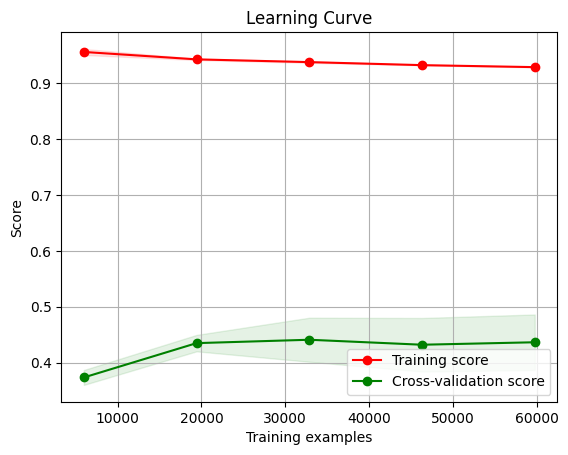

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(logistic_reg, "Learning Curve", X_train, y_train, cv=5)
plt.show()


## Hyperparameter Tuning (Grid Search)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}]  # Example class weights
# }

param_grid = {
    'penalty': ['l1', 'l2'],  # regularization penalty (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 10]  # regularization strength
}

# Initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Loricson\AppData\Local\Programs\Python\Python310\lib\

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [51]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [52]:
best_params
best_model

LogisticRegression(C=0.1, max_iter=1000)

In [76]:
#logistic_reg = LogisticRegression(C=C)
C = 1
logistic_reg = LogisticRegression(C=C, max_iter=1000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [77]:
# Make predictions on the validation set
y_pred = logistic_reg.predict(X_validation)

In [78]:
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
f1 = f1_score(y_validation, y_pred, average='weighted')
report = classification_report(y_validation, y_pred)

In [79]:
print("Accuracy: {0:0.4f}".format(accuracy*100, '%'),"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(report)

Accuracy: 96.7968 %
Precision: 0.968081425203677
Recall: 0.9679679679679679
F1-Score: 0.9679501650742751
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       171
           1       0.96      0.98      0.97       266
           2       0.98      0.98      0.98       285
           3       0.97      0.96      0.96       277

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999

